<a href="https://colab.research.google.com/gist/Shehryar-Hussain/f5ad237bd4923641fd985134a8a574a9/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the relevant dataset and libraries.

In [1]:
# Importing Libraries.
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from functools import partial
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [7]:
# Importing the modeling dataset.
test = pd.read_csv("sign_langage_data/sign_mnist_test/sign_mnist_test.csv")
train = pd.read_csv("sign_langage_data/sign_mnist_train/sign_mnist_train.csv")

In [8]:
train.shape

(27455, 785)

In [9]:
test.shape

(7172, 785)

In [10]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [11]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [12]:
# Understanding the distribution of the overall dataset
labels = train["label"].value_counts().sort_index(ascending=True)
labels 

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

## Splitting the data into train-test splits.

In [13]:
# Seperating testing and training data. 
train_x = train.drop(labels = "label", axis = 1)
train_y = train["label"]
test_x = test.drop(labels = "label", axis = 1)
test_y = test["label"]
train_x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


## Data Preprocessing and Visualization.

In [15]:
# Storing test and training classes before transforming the data. 
test_classes= test_y
train_classes = train_y

In [16]:
# Converting to numpy array.
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

In [17]:
train_x.shape

(27455, 784)

In [18]:
test_x.shape

(7172, 784)

In [19]:
# Reshaping the data for visualizations.
train_x = train_x.reshape(-1,28,28)
test_x = test_x.reshape(-1,28,28)

In [20]:
train_x.shape

(27455, 28, 28)

In [21]:
test_x.shape

(7172, 28, 28)

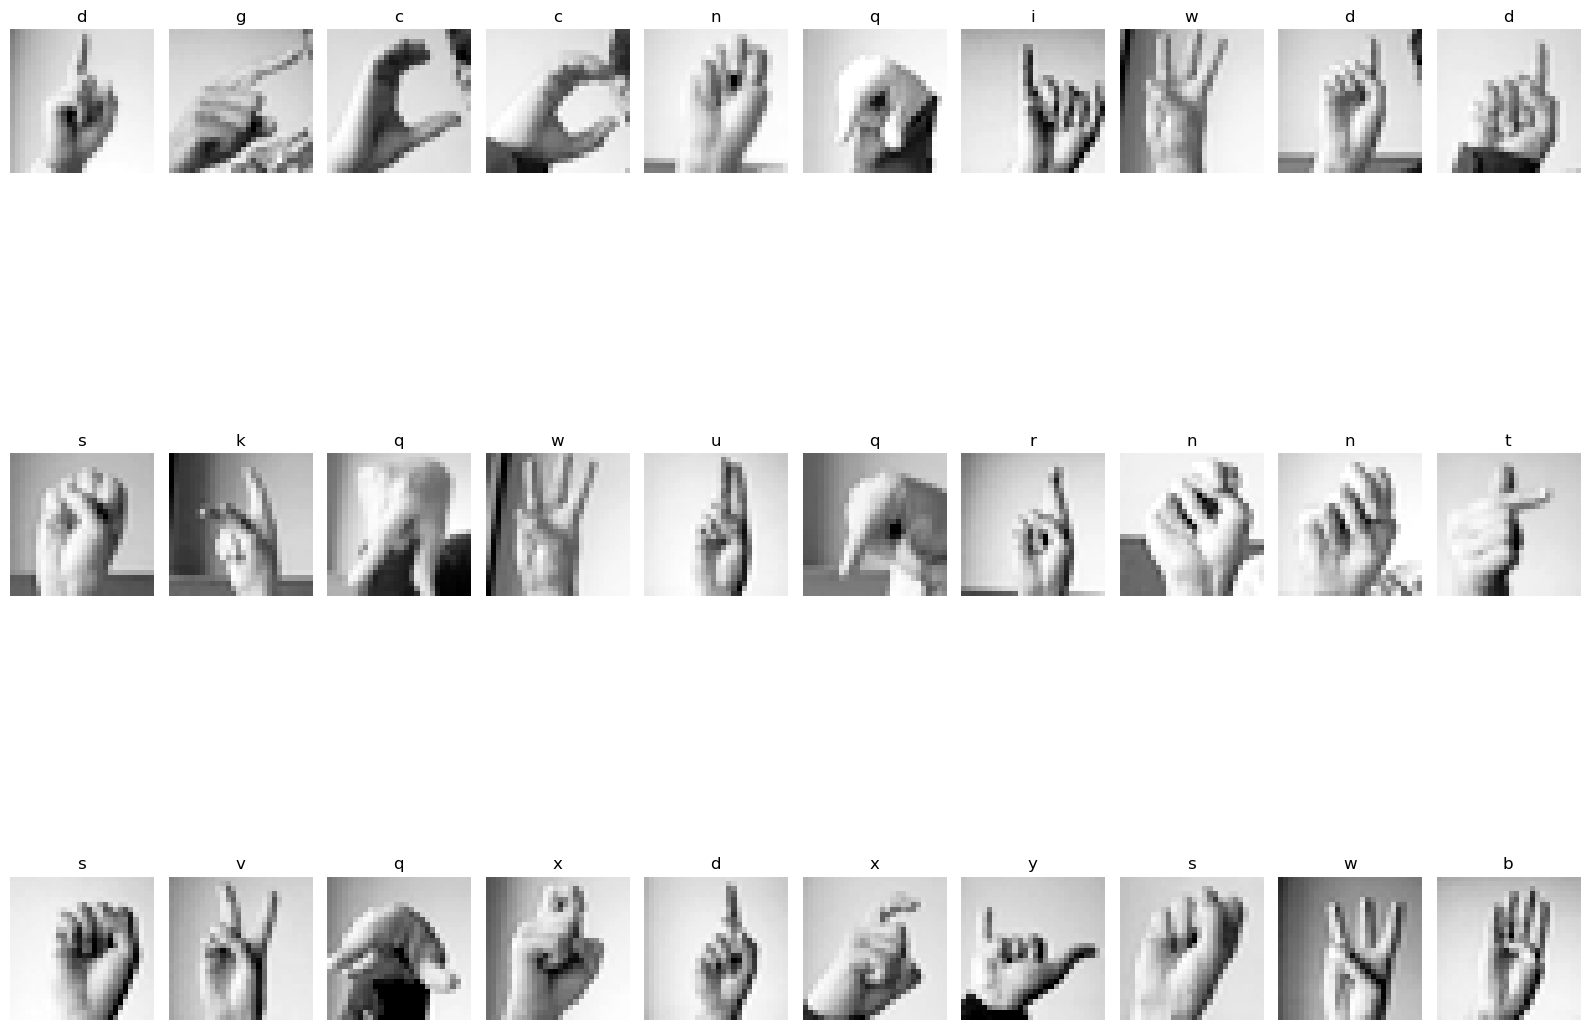

In [22]:
# Ploting a sample of 30 images from the training set.
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(3, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(30):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(train_x, train_y)

In [23]:
train_x.shape

(27455, 28, 28)

In [24]:
train_y.shape

(27455,)

In [25]:
test_x.shape

(7172, 28, 28)

## Developing a Convolution Neural Network.

In [26]:
# Creating a Convolution Neural Network (CNN).
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')])
  

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
  
    return model

In [27]:
model = create_model()

In [28]:
history = model.fit(train_x, train_y, epochs=100, validation_data=(test_x, test_y))

Epoch 1/100
858/858 [==============================] - 6s 6ms/step - loss: 0.6040 - accuracy: 0.9009 - val_loss: 0.6373 - val_accuracy: 0.8618
Epoch 2/100
858/858 [==============================] - 6s 7ms/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.6713 - val_accuracy: 0.8811
Epoch 3/100
858/858 [==============================] - 6s 7ms/step - loss: 1.5834e-04 - accuracy: 1.0000 - val_loss: 0.6785 - val_accuracy: 0.8815
Epoch 4/100
858/858 [==============================] - 6s 7ms/step - loss: 4.3455e-05 - accuracy: 1.0000 - val_loss: 0.6993 - val_accuracy: 0.8819
Epoch 5/100
858/858 [==============================] - 6s 7ms/step - loss: 2.4113e-05 - accuracy: 1.0000 - val_loss: 0.7006 - val_accuracy: 0.8833
Epoch 6/100
858/858 [==============================] - 6s 7ms/step - loss: 1.4724e-05 - accuracy: 1.0000 - val_loss: 0.7055 - val_accuracy: 0.8854
Epoch 7/100
858/858 [==============================] - 6s 7ms/step - loss: 9.5626e-06 - accuracy: 1.0000 - val_loss: 0.7165 - 

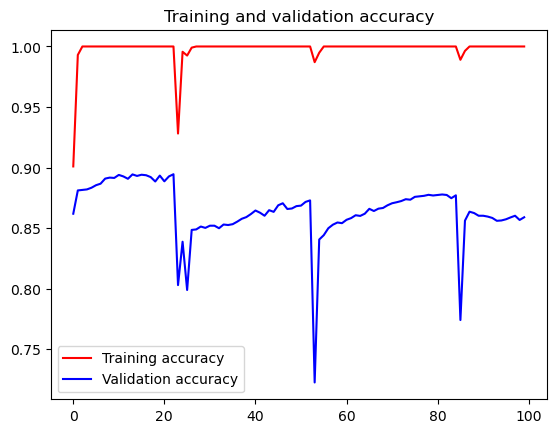

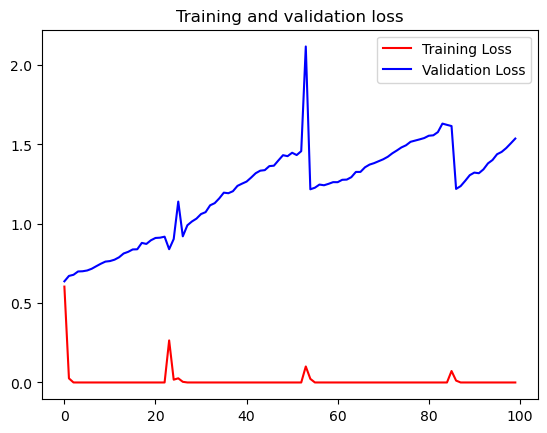

In [29]:
# Plotting model performance. 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Developing a Resnet-50 Model. 

In [30]:
# Defining the identity block of the Resnet-50 Model. 
def identity_block(X, f, filters, training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # First Component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
   
    # Second Component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (1,1), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
   
    # Third Component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    
    # Adding the two tensors 
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    
    # Returning the last output
    return X

In [31]:
# Defining the Convolution Block of the Resnet-50 Model. 
def convolutional_block(X, f, filters, s=2,training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # First Component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    
    # Second Component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (s,s), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    
    # Third Component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    
    # Converting the Input Volume to the match the last output for addition. 
    X_shortcut =tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis = 3)(X_shortcut, training = training)
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    
    # Adding the last two tensors
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    # Returning the output tensor
    return X

In [32]:
# Defining a modified Resnet-50 Model using the Identity and Convolution Blocks. 
def ResNet50(input_shape = (28, 28, 1), classes = 26):
    
    # Defining the input as a tensor with shape input_shape
    X_input = tf.keras.Input(input_shape)
    
    # Zero-Padding
    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = tf.keras.layers.Conv2D(64, (5, 5), strides = (1, 1))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    
    # Add an Average Pool Layer
    X = tf.keras.layers.AveragePooling2D((2,2))(X)

    # Output Layer
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(classes, activation='softmax')(X)
    
    # Create Model
    model = tf.keras.Model(inputs = X_input, outputs = X)

    return model

In [33]:
model = ResNet50()

In [34]:
model.compile(optimizer="adam",metrics=["accuracy"],loss = "sparse_categorical_crossentropy")

In [36]:
history = model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs =100)

Epoch 1/100
858/858 [==============================] - 60s 70ms/step - loss: 0.1291 - accuracy: 0.9706 - val_loss: 0.2268 - val_accuracy: 0.9604
Epoch 2/100
858/858 [==============================] - 61s 71ms/step - loss: 0.1299 - accuracy: 0.9799 - val_loss: 0.3901 - val_accuracy: 0.9463
Epoch 3/100
858/858 [==============================] - 55s 64ms/step - loss: 0.0485 - accuracy: 0.9920 - val_loss: 0.8142 - val_accuracy: 0.9292
Epoch 4/100
858/858 [==============================] - 56s 65ms/step - loss: 0.0160 - accuracy: 0.9973 - val_loss: 0.3273 - val_accuracy: 0.9611
Epoch 5/100
858/858 [==============================] - 57s 67ms/step - loss: 4.2450e-06 - accuracy: 1.0000 - val_loss: 0.3203 - val_accuracy: 0.9611
Epoch 6/100
858/858 [==============================] - 57s 66ms/step - loss: 1.4584e-06 - accuracy: 1.0000 - val_loss: 0.3152 - val_accuracy: 0.9615
Epoch 7/100
858/858 [==============================] - 56s 65ms/step - loss: 1.1229e-06 - accuracy: 1.0000 - val_loss: 0.3

KeyboardInterrupt: 

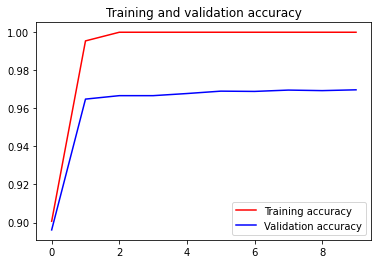

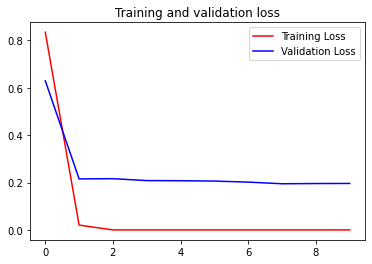

In [ ]:
# Plotting model performance.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Saving the model for future use. 
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
from google.colab import files
files.download('saved_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
!zip -r ./saved_model.zip ./saved_model/
files.download('/content/saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Live Image Testing

In [ ]:
# Importing Relevant Libraries
import keras
import numpy as np
from PIL import Image
import string
import pandas as pd
import tensorflow as tf

In [ ]:
# Checking current directory
import os
print(os.getcwd())

In [ ]:
# Importing OpenCV
import cv2
from matplotlib import pyplot

## Setting our variables
dim = (28, 28) # training set dimensions
letters = list(string.ascii_lowercase) # rerun the list of letter to translate predictions

x0 = 1920 // 2 - 400 # 400px left of center
x1 = 1920 // 2 + 400 # 400px right of center
y0 = 1080 // 2 - 400 # 400px right of center
y1 = 1080 // 2 + 400 # 400px right of center


# initiate video capture
video=cv2.VideoCapture(0)

cv2.namedWindow('Webcam') # Create a named window
cv2.moveWindow('Webcam',40,30) # Place that window

while video.isOpened(): # While user didn't quit the live recording, run the window
    ret,capture = video.read() # grabbing each frame of webcam footage
    cropped = capture[y0:y1, x0:x1] # Slicing to get centered square for model
    img = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) # Gray scale image, like training dataset
    img = cv2.GaussianBlur(img, (5, 5), 0) # Smoothing out the image
    img = cv2.resize(img, dim) # resizing frame size, must match video output frame size
    pyplot.imshow(img, cmap='gray') # Show given image to the model
    pyplot.show() # display it
    img = np.reshape(img, (1,img.shape[0],img.shape[1],1))
    img = tf.cast(img, tf.float32)
    pred=model.predict(img)

    # Visualising the results live
    cv2.rectangle(capture, (x0,y0),(x1,y1),(255,0,0),2) # Adding a rectangle to the image
    cv2.putText(capture,'{} res50'.format(letters[np.argmax(pred[0])]),(x0+25,y0+50),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),1) # predicted letter
    cv2.imshow('Webcam', capture) # Show video
    
    # Print results in log
    print(pred) # Print predicted array with attribution to each letter
    print(letters[np.argmax(pred[0])]) # Print in log predicted letter
    
    # Quit live footage
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
video.release()
cv2.destroyAllWindows()